 Web APIs and Classification

This project involves the use of Natural Language Processing and Computer Modelling along with Web APIs.


Problem Statement: Introduce the concept of natural language to students using data gathered by visiting two subrebbits from the reddit website to create a text filled dataset comprised of the titles of approximately 1000 post from each subreddits. The dataset will be transformed via natural language processing tools to a form that can be used by models to catagorize the titles into the correct subreddits from which they came. CountVectorizer and TfidfVectorizer will be tried for the transformations and the test models will be Logisitic Regression, KNNeighbors,MultinomialNB, DecisionTree, RandomForests,BaggingClassifier, ADABoost, and Support Vector Machines. The results will be scored according to accuracy on training and test data.

First import all necessary packages and libraries for data collection,cleaning, transformation,modelling and visuals

In [4]:

import requests
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import  cross_val_score,train_test_split, GridSearchCV
from nltk.stem.porter import PorterStemmer
import regex as re
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier,RandomForestClassifier;
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


This code was used to visit the reddit websites to collect the data required. The data has been saved to a csv to avoid having to repull this information from the reddit site. Since there is no reason to pull more data, the code has been disabled.

In [3]:
# Define URL and username
#url_name = "https://www.reddit.com/r/movies.json" # change subreddit here
#username = {"User-agent": 'boom-deva'}      # header to prevent 429 error

In [4]:
# Function to pull subreddit posts
#def get_subreddit(url, n_pulls, headers):    

    # Create empty templates
    #posts = []
    #after = None

    # Create a loop that does max 25 requests per pull
    #for pull_num in range(n_pulls):
        #print("Pulling data attempted", pull_num+1,"time(s)")

        #if after == None:
            #new_url = url                 # base case
        #else:
            #new_url = url+"?after="+after # subsequent iterations

        #res = requests.get(new_url, headers=headers)

        #if res.status_code == 200:
            #subreddit_json = res.json()                      # Pull JSON
            #posts.extend(subreddit_json['data']['children']) # Get subreddit posts
            #after = subreddit_json['data']['after']          # 'after' = ID of the last post in this iteration
        #else:
           # print("We've run into an error. The status code is:", res.status_code)
            #break

        #time.sleep(1)
        
    #return(posts)

In [5]:
# Call function
#post_movies = get_subreddit(url_name, n_pulls = 40, headers = username)


In [6]:
#post_movies[0]['data']['title']

In [7]:
#movie_titles = []
#for i in range(len(post_movies)):
    #re.sub("[^a-zA-Z]",           # The pattern to search for
                      #" ",                   # The pattern to replace it with
      # post_movies[i]["data"]['title'] )   # The text to search                                    
    
    #movie_titles.append(post_movies[i]["data"]['title'])

In [8]:
# Define URL and username
#url_name = "https://www.reddit.com/r/television.json" # change subreddit here
#username = {"User-agent": 'boom-deva'} 

In [9]:
# Call function
#post_television = get_subreddit(url_name, n_pulls = 40, headers = username)

In [10]:
#post_television[0]['data']['title']

In [11]:
#tv_titles = []
#for i in range(len(post_television)):
    #tv_titles.append(post_television[i]["data"]['title'])

Preprocessing

This next section of code has also been disabled. It was used to clean the data of punctuation and empty spaces. Also the stemmer was employed to cull the features. The cleaned data were then collected into lists TV and Movie, turned into dictionaries and then dataframes that were saved to csv a file  

In [12]:
# Instantiate object of class PorterStemmer.
#p_stemmer = PorterStemmer()

In [13]:
#def string_to_words(string_word):
    # Function to convert a string of words
    # The input is a single string (subreddit post title), and 
    # the output is a single string (a preprocessed title)
    
    
    # 1. Remove non-letters.
    #letters_only = re.sub("[^a-zA-Z]", " ", string_word)
    
    #2 P-stemmer
    #stemmed = p_stemmer.stem(letters_only)
    
    # 3. Convert to lower case, split into individual words.
    #words = stemmed.lower().split()
    
    # 4. In Python, searching a set is much faster than searching
    # a list, so convert the stop words to a set.
    #stops = set()This is where I could have inserted a custom 
    #set of stop words, perhaps for a different challenge

    
    # 5. Remove stop words.
    #meaningful_words = [w for w in words if not w in stops]
    
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    #return (" ".join(meaningful_words))
    

In [14]:
#clean_movie_titles = []
#clean_tv_titles = []

In [15]:
#Loop through the movie titles list and apply stemmer, remove 
#punctuation, spaces,and non letters , set to lower case
#for movie_title in movie_titles:
    # Convert title to words, then append to clean_movue_titles.
    #clean_movie_titles.append(string_to_words(movie_title))        
    
#for tv_title in tv_titles:
    # Convert title to words, then append to clean_tv_titles.
    #clean_tv_titles.append(string_to_words(tv_title))
    

In [16]:
#Creating dictionary for preprocessed movie titles
#movie_titles_dict = {index:title for index,title
                     #in enumerate(clean_movie_titles)}

In [17]:
#Creating dictionary for preprocessed television titles
#television_titles_dict = {index:title for index,title
                          #in enumerate(clean_tv_titles)}

In [18]:
#Create dataframes from the movie dictionary
#movie_df = pd.DataFrame(movie_titles_dict.values(), index = movie_titles_dict.keys(), columns = ["Title"])
#movie_df.head()

In [19]:
#Create dataframe from the television dictionary
#tv_df = pd.DataFrame(television_titles_dict.values(), index = television_titles_dict.keys(), columns = ["Title"])
#tv_df.head()

In [20]:
#movie_df.shape

In [21]:
#tv_df.shape

In [25]:
#adding column for target movie =0 , tv =1
#movie_df['source'] = 0
#tv_df['source'] = 1

In [23]:
#combining the movie and tv dataframes
#reddit = [movie_df , tv_df]
#df = pd.concat(reddit)

In [24]:
#looking at a piece of the combined data
#df.tail()

In [26]:
#df.shape

In [27]:
#df.isnull().sum()

In [28]:
#df.to_csv("./reddit.csv")  
#saving final merged file

These lines are reading the csv back into the notebook, dropping the extra "Unnamed" column , also necessary to reverse designation for source column because TV is the majority class.

In [5]:
df = pd.read_csv('./reddit.csv')

In [6]:
df.drop(columns='Unnamed: 0', inplace=True)

In [7]:
df['source'] = df['source'].replace({0:1,1:0})

This is the cleaned data. The source column shows 0 for movie post and 1 for tv post.

In [32]:
df.head()

,Title,source
0,detective pikachu official chinese post,0
1,poster for joker with joaquin phoenix,0
2,lindsay ellis video essay on the making of pet...,0
3,superbad to the oscars jonah hill s evolution ...,0
4,john hughes directed movies sixteen candles th...,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950 entries, 0 to 1949
Data columns (total 2 columns):
Title     1950 non-null object
source    1950 non-null int64
dtypes: int64(1), object(1)
memory usage: 30.5+ KB


The csv file saved data and  target together. This code seperates them into x for data and y for the target

In [8]:
X = df['Title']

In [9]:
y = df['source']

This is the Baseline Score TV is 0.508 of the total, what we could expect to see without a model, percentage of majority class present in the data.

In [36]:
#This shows the percentage of TV posts vs movie posts
y.value_counts(normalize=True)

1    0.508718
0    0.491282
Name: source, dtype: float64

The data is split into two portions a set to train the models on (75% of total) and a set to test the models on(25% of total), a random state is set to maintain consistency of outcomes and stratify is used to maintain relative breakdown of the target.

In [10]:
# Conduct a train/test split.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.25,
                                                    random_state = 42,
                                                     stratify=y)

In [39]:
#checking that the train and test distributions 
#for the target variable are similar
print('y_train  is',y_train.value_counts(normalize=True))
print('y_test mean is',y_test.value_counts(normalize=True))

y_train  is 1    0.508892
0    0.491108
Name: source, dtype: float64
y_test mean is 1    0.508197
0    0.491803
Name: source, dtype: float64


The data in X_train and X_test are the cleaned tv and movie titles. The vectorizers will return a a vector of counts for the number of times each word or phrase appears in the data organized by row for the titles and words/phrases in the columns. The models will then look for patterns to determine whether the row is a movie or tv post. All of the models are classification models since the target is discrete.

Vectorizers and Models

Logistic Regression with Count Vectorizer

Like linear regression this model seeks to find a line of best fit, in this case the line is between 0 and 1, not to infinity as with the linear model.This model seeks to predict binary outcomes and has a few parameters that can be adjusted, the penalty l1(Lasso),l2(Ridge)and C for inverse regularization strength.

Pipeline allows the Vectorizer and Model to be implemented sequentially together.

In [40]:
pipe_lr = Pipeline([    #combines two instantiating but order counts
    ('cvec', CountVectorizer()), # order counts , put model second
    ('lr',LogisticRegression()) #used in combination with Gridsearch
                                # to test all of those param tuning
])

Pipeline is used in conjunction with Gridsearch to allow hyperparameter tuning for both the vectorizer and the model.The parameters in this situation are stop words english or none, maximum features to be included, ngram- whether to look at single words or more, regularization strength, and penalty-to help reduce overfitting.

In [41]:
# Tune GridSearchCV
pipe_params ={
    'cvec__stop_words':[None,'english'],
    'cvec__max_features':[1500,2500,3000],
    'cvec__ngram_range':[(1,1),(1,2)],
    'lr__C':[50,100,150],
    'lr__penalty':['l1','l2']
}
gs = GridSearchCV(pipe_lr, param_grid = pipe_params,cv=5)
gs.fit(X_train,y_train);
print(gs.best_score_)
gs.best_params_

0.9158686730506156


{'cvec__max_features': 2500,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': 'english',
 'lr__C': 150,
 'lr__penalty': 'l2'}

Running the cell above can generate a cross val score and training and test scores as well as the optimal parameters of the choices allowed. The scores are being collecting for comparision.

In [42]:
lr_cvec_cross=gs.best_score_

In [43]:
# Train score
lr_cvec_train=gs.score(X_train,y_train)

In [44]:
# Test score
lr_cvec_test=gs.score(X_test,y_test)

Creating a dataframe to house all of the scores of all of the combinations-there will be 16 sets.

In [45]:
headings =['Models','CrossValScores','Training Scores','Test Scores']
lr_cvec =['LogisticRegression/CountVectorizer',lr_cvec_cross,lr_cvec_train,lr_cvec_test]

In [46]:
results = pd.DataFrame(lr_cvec,headings)

Logistic Regression with TFIDF

The approach will be the same for all the combinations. Tfidf differs from Count Vectorizer in that Tfidf rewards rare words more than common ones and so could have a different result as that may cause a model to focus more on the rare words.

In [47]:
pipe_lr_tf = Pipeline([    #combines two instantiating but order counts
    ('tf', TfidfVectorizer()), # order counts , put model second
    ('lr',LogisticRegression()) #used in combination with Gridsearch
                                # to test all of those param tuning
])

In [48]:
# Tune GridSearchCV
pipe_params ={
    'tf__stop_words':[None,'english'],
    'tf__max_features':[1000,3000,5000],
    'tf__ngram_range':[(1,1),(1,2)],
    'lr__C':[0.1,1,10],
    'lr__penalty':['l1','l2']
}
gs = GridSearchCV(pipe_lr_tf, param_grid = pipe_params,cv=5)
gs.fit(X_train,y_train);
print(gs.best_score_)
gs.best_params_

0.9247606019151847


{'lr__C': 10,
 'lr__penalty': 'l2',
 'tf__max_features': 5000,
 'tf__ngram_range': (1, 1),
 'tf__stop_words': None}

In [49]:
#CV Score
lr_tf_cross = gs.best_score_

In [50]:
# Train score
lr_tf_train = gs.score(X_train,y_train)

In [51]:
# Test score
lr_tf_test = gs.score(X_test,y_test)

Adding the scores to the results df

In [52]:
lr_tf =['LogisticRegression/TfidfVectorizer',lr_tf_cross,lr_tf_train,lr_tf_test]

In [53]:
results[1]=lr_tf

KNNeighbors with Count Vectorizer

KNNeighbors is a model that uses distance and number of neighbors in neighborhood to arrive at at conclusion.

In [54]:
pipe_knn = Pipeline([    #combines two instantiating but order counts
    ('cvec', CountVectorizer()),
    ('knn',KNeighborsClassifier())])                       # order counts , put model second
     #used in combination with Gridsearch
                                # to test all of those param tuning

In [55]:
 #Tune GridSearchCV
pipe_params ={
    'cvec__stop_words':[None,'english'],
    'cvec__max_features':[750,1250,1750],
    'cvec__ngram_range':[(1,1),(1,2)],
    'knn__n_neighbors':[3,5,11],
    'knn__p':[1,2]}

gs = GridSearchCV(pipe_knn, param_grid = pipe_params,cv=3)
gs.fit(X_train,y_train);
print(gs.best_score_)
gs.best_params_

0.780437756497948


{'cvec__max_features': 1750,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': 'english',
 'knn__n_neighbors': 5,
 'knn__p': 1}

In [56]:
#Cross Val score
knn_cvec_cross = gs.best_score_

In [57]:
# Train score
knn_cvec_train = gs.score(X_train,y_train)

In [58]:
# Test score
knn_cvec_test = gs.score(X_test,y_test)

Results being added to the dataframe

In [59]:
knn_cvec =['KNNeighbors/CountVectorizer',knn_cvec_cross,knn_cvec_train,knn_cvec_test]

In [60]:
results[2]=knn_cvec

KNNeighbors with TFIDF Vectorizer

In [61]:
pipe_knn_tf = Pipeline([    #combines two instantiating but order counts
    ('tf', TfidfVectorizer()),
    ('knn',KNeighborsClassifier())])                       # order counts , put model second
     #used in combination with Gridsearch
                                # to test all of those param tuning

In [62]:
 #Tune GridSearchCV
pipe_params ={
    'tf__stop_words':[None,'english'],
    'tf__max_features':[500,750,1000],
    'tf__ngram_range':[(1,1),(1,2)],
    'knn__n_neighbors':[3,5,7],
    'knn__p':[1,2]}

gs = GridSearchCV(pipe_knn_tf, param_grid = pipe_params,cv=3)
gs.fit(X_train,y_train);
print(gs.best_score_)
gs.best_params_

0.7941176470588235


{'knn__n_neighbors': 5,
 'knn__p': 2,
 'tf__max_features': 1000,
 'tf__ngram_range': (1, 1),
 'tf__stop_words': None}

In [63]:
#Cross Val Score
knn_tf_cross = gs.best_score_

In [64]:
# Train score
knn_tf_train = gs.score(X_train,y_train)

In [65]:
# Test score
knn_tf_test = gs.score(X_test,y_test)

Results being added to dataframe

In [66]:
knn_tf =['KNNeighbors/TfidfVectorizer',knn_tf_cross,knn_tf_train,knn_tf_test]

In [67]:
results[3]=knn_tf

Multinomial NB with CountVectorizer

Multinomial Naive Bayes is one of a group of models that uses probabilities(knowing which words in a line of text, courtesy of the vectorizer) to come to a decision. The alpha is a smoothing parameter range 0 to 1

In [68]:
pipe_nb = Pipeline([('cvec', CountVectorizer()),
                    ('nb', MultinomialNB())])    
    

In [69]:
#Tune GridSearchCV
pipe_params ={
    'cvec__stop_words':[None,'english'],
    'cvec__max_features':[2500,3000,3500],
    'cvec__ngram_range':[(1,1),(1,2)],
    'nb__alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)
    
}
gs = GridSearchCV(pipe_nb, param_grid = pipe_params,cv=3)
gs.fit(X_train,y_train);
print(gs.best_score_)
gs.best_params_

0.8912448700410397


{'cvec__max_features': 2500,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': 'english',
 'nb__alpha': 0.1}

In [70]:
#Cross Val Score
nb_cvec_cross = gs.best_score_

In [71]:
# Train score
nb_cvec_train = gs.score(X_train,y_train)

In [72]:
# Test score
nb_cvec_test = gs.score(X_test,y_test)

Collecting the results

In [73]:
nb_cvec =['Multinomial/CountVectorizer',nb_cvec_cross,nb_cvec_train,nb_cvec_test]

In [74]:
results[4]=nb_cvec

MultinomialNB with TfidfVectorizor

This model can handle the decimals produced by Tfidf

In [75]:
pipe_nb_tf = Pipeline([('tf', TfidfVectorizer()),
                    ('nb', MultinomialNB())])    

In [76]:
#Tune GridSearchCV
pipe_params ={
    'tf__stop_words':[None,'english'],
    'tf__max_features':[2500,3000,3500],
    'tf__ngram_range':[(1,1),(1,2)],
    'nb__alpha': (2,1, 0.1, 0.01, 0.001, 0.0001, 0.00001)
    
}
gs = GridSearchCV(pipe_nb_tf, param_grid = pipe_params,cv=5)
gs.fit(X_train,y_train);
print(gs.best_score_)
gs.best_params_

0.9049247606019152


{'nb__alpha': 1,
 'tf__max_features': 3500,
 'tf__ngram_range': (1, 1),
 'tf__stop_words': None}

In [77]:
#Cross val Score
nb_tf_cross = gs.best_score_

In [78]:
# Train score
nb_tf_train = gs.score(X_train,y_train)

In [79]:
# Test score
nb_tf_test = gs.score(X_test,y_test)

Collecting the results

In [80]:
nb_tf =['Multinomial/TfidfVectorizer',nb_tf_cross,nb_tf_train,nb_tf_test]

In [81]:
results[5]=nb_tf

Classic Decision Tree with Count Vectorizer

Order counts with decision trees and results can vary, even with the same beginning.There are quite a few parameters available to decision trees. This model used max_depth-how tall the tree should be allowed to grow and max features how many features the tree should be allowed to see at each node. 

In [82]:
pipe_dt = Pipeline([    #combines two instantiating but order counts
    ('cvec', CountVectorizer()), # order counts , put model second
    ('dt',DecisionTreeClassifier()) #used in combination with Gridsearch
                                # to test all of those param tuning
])

In [83]:
# Tune GridSearchCV
pipe_params ={
    'cvec__stop_words':[None,'english'],
    'cvec__max_features':[500,750,1000],
    'cvec__ngram_range':[(1,1),(1,2)],
    'dt__max_depth':[70,80,90],
    'dt__max_features':[60,70,80]
}
gs = GridSearchCV(pipe_dt, param_grid = pipe_params,cv=3)
gs.fit(X_train,y_train);
print(gs.best_score_)
gs.best_params_

0.8590971272229823


{'cvec__max_features': 750,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': None,
 'dt__max_depth': 90,
 'dt__max_features': 70}

In [84]:
#Cross Val Score
dt_cvec_cross = gs.best_score_

In [85]:
# Train score
dt_cvec_train = gs.score(X_train,y_train)

In [86]:
# Test score
dt_cvec_test = gs.score(X_test,y_test)

Collecting the results

In [87]:
dt_cvec =['DecisionTree/CountVectorizer',dt_cvec_cross,dt_cvec_train,dt_cvec_test]

In [88]:
results[6]=dt_cvec

Classic Decision Tree with TfidfVectorizer

In [89]:
pipe_dt_tf = Pipeline([    #combines two instantiating but order counts
    ('tf', TfidfVectorizer()), # order counts , put model second
    ('dt',DecisionTreeClassifier()) #used in combination with Gridsearch
                                # to test all of those param tuning
])

In [90]:
# Tune GridSearchCV
pipe_params ={
    'tf__stop_words':[None,'english'],
    'tf__max_features':[400,500,600],
    'tf__ngram_range':[(1,1),(1,2),(2,2)],
    'dt__max_depth':[70,110,150],
    'dt__max_features':[60,80,100]
}
gs = GridSearchCV(pipe_dt_tf, param_grid = pipe_params,cv=3)
gs.fit(X_train,y_train);
print(gs.best_score_)
gs.best_params_

0.8604651162790697


{'dt__max_depth': 150,
 'dt__max_features': 100,
 'tf__max_features': 400,
 'tf__ngram_range': (1, 1),
 'tf__stop_words': None}

In [91]:
#Cross Val Score
dt_tf_cross = gs.best_score_

In [92]:
# Train score
dt_tf_train = gs.score(X_train,y_train)

In [93]:
# Test score
dt_tf_test = gs.score(X_test,y_test)

Collecting the results

In [94]:
dt_tf =['DecisionTree/TfidfVectorizer',dt_tf_cross,dt_tf_train,dt_tf_test]

In [95]:
results[7]=dt_tf

Bagging Classifier with Count Vectorizer

The Bagging classifier is a variant of decision tree,involving growing multiple trees at the same time on random subsets of features. A decision is arrived at by vote or average. Parameters uses n_estimators -number of trees grown and max features the size of each tree's subset.

In [96]:
pipe_bag = Pipeline([    #combines two instantiating but order counts
    ('cvec', CountVectorizer()), # order counts , put model second
    ('bag',BaggingClassifier()) #used in combination with Gridsearch
                                # to test all of those param tuning
])

In [97]:
# Tune GridSearchCV for Count Vec with Bagging Classifier
pipe_params ={
    'cvec__stop_words':[None,'english'],
    'cvec__max_features':[1000,1500,2000],
    'cvec__ngram_range':[(1,1),(1,2)],
    'bag__n_estimators':[10,50,100],
    'bag__max_features':[250,500,750]
}
gs = GridSearchCV(pipe_bag, param_grid = pipe_params,cv=3)
gs.fit(X_train,y_train);
print(gs.best_score_)
gs.best_params_

0.8953488372093024


{'bag__max_features': 750,
 'bag__n_estimators': 100,
 'cvec__max_features': 2000,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': 'english'}

In [98]:
#Cross Val Score
bag_cvec_cross = gs.best_score_

In [99]:
# Train score
bag_cvec_train = gs.score(X_train,y_train)

In [100]:
# Test score
bag_cvec_test = gs.score(X_test,y_test)

Sending results to the dataframe

In [101]:
bag_cvec =['Bagging/CountVectorizer',bag_cvec_cross,bag_cvec_train,bag_cvec_test]

In [102]:
results[8]= bag_cvec

Bagging Classifier with TfidfVectorizer

In [103]:
pipe_bag_tf = Pipeline([    #combines two instantiating but order counts
    ('tf', TfidfVectorizer()), # order counts , put model second
    ('bag',BaggingClassifier()) #used in combination with Gridsearch
                                # to test all of those param tuning
])

In [104]:
# Tune GridSearchCV
pipe_params ={
    'tf__stop_words':[None,'english'],
    'tf__max_features':[500,1000,1500],
    'tf__ngram_range':[(1,1),(1,2)],
    'bag__n_estimators':[10,50,100],
    'bag__max_features':[10,100,500]
}
gs = GridSearchCV(pipe_bag_tf, param_grid = pipe_params,cv=3)
gs.fit(X_train,y_train);
print(gs.best_score_)
gs.best_params_

0.8898768809849521


{'bag__max_features': 500,
 'bag__n_estimators': 50,
 'tf__max_features': 1500,
 'tf__ngram_range': (1, 1),
 'tf__stop_words': 'english'}

In [105]:
#Cross Val Score
bag_tf_cross = gs.best_score_

In [106]:
# Train score
bag_tf_train = gs.score(X_train,y_train)

In [107]:
# Test score
bag_tf_test = gs.score(X_test,y_test)

Collecting the results 

In [108]:
bag_tf =['Bagging/TfidfVectorizer',bag_tf_cross,bag_tf_train,bag_tf_test]

In [109]:
results[9]=bag_tf

ADA Boost Classifier with Count Vectorizer

ADABoost is a decision tree type model where max depth =1 and multiple trees are grown sequentially. This model involves a learning rate parameter and n_estimator parameter for number of trees to grow.

In [110]:
pipe_ada = Pipeline([    #combines two instantiating but order counts
    ('cvec', CountVectorizer()), # order counts , put model second
    ('ada',AdaBoostClassifier()) #used in combination with Gridsearch
                                # to test all of those param tuning
])

In [111]:
# Tune GridSearchCV
pipe_params ={
    'cvec__stop_words':[None,'english'],
    'cvec__max_features':[1000,1500,2000],
    'cvec__ngram_range':[(1,1),(1,2)],
    'ada__n_estimators':[100,150,200],
    'ada__learning_rate':[1,1.5,2]
}
gs = GridSearchCV(pipe_ada, param_grid = pipe_params,cv=3)
gs.fit(X_train,y_train);
print(gs.best_score_)
gs.best_params_

0.859781121751026


{'ada__learning_rate': 1,
 'ada__n_estimators': 200,
 'cvec__max_features': 2000,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': None}

In [112]:
#Cross Val Score
ada_cvec_cross = gs.best_score_

In [113]:
# Train score
ada_cvec_train = gs.score(X_train,y_train)

In [114]:
# Test score
ada_cvec_test = gs.score(X_test,y_test)

Sending results to dataframe

In [115]:
ada_cvec =['ADABoost/CountVectorizer',ada_cvec_cross,ada_cvec_train,ada_cvec_test]

In [116]:
results[10]=ada_cvec

ADA Booster with Tfidf Vectorizer

In [117]:
pipe_ada_tf = Pipeline([    #combines two instantiating but order counts
    ('tf', TfidfVectorizer()), # order counts , put model second
    ('ada',AdaBoostClassifier()) #used in combination with Gridsearch
                                # to test all of those param tuning
])

In [118]:
# Tune GridSearchCV
pipe_params ={
    'tf__stop_words':[None,'english'],
    'tf__max_features':[1000,1500,2000],
    'tf__ngram_range':[(1,1),(1,2)],
    'ada__n_estimators':[100,150,200],
    'ada__learning_rate':[1,1.5,2]
}
gs = GridSearchCV(pipe_ada_tf, param_grid = pipe_params,cv=3)
gs.fit(X_train,y_train);
print(gs.best_score_)
gs.best_params_

0.8700410396716827


{'ada__learning_rate': 1.5,
 'ada__n_estimators': 200,
 'tf__max_features': 2000,
 'tf__ngram_range': (1, 1),
 'tf__stop_words': 'english'}

In [119]:
#Cross Val Score
ada_tf_cross = gs.best_score_

In [120]:
# Train score
ada_tf_train = gs.score(X_train,y_train)

In [121]:
# Test score
ada_tf_test = gs.score(X_test,y_test)

Collecting results

In [122]:
ada_tf =['ADABoost/TfidfVectorizer',ada_tf_cross,ada_tf_train,ada_tf_test]

In [123]:
results[11]=ada_tf

Random Forest and Count Vectorizer

Random Forest is also a decision tree based model.This model involves growing trees from randomly chosen subsets of features at each node. The parameters chosen are n_estimators for number of trees, max depth for amount of branching and max features for the number of randomly chosen features available at each node of each tree.

In [124]:
pipe_rf = Pipeline([    #combines two instantiating but order counts
    ('cvec', CountVectorizer()), # order counts , put model second
    ('rf',RandomForestClassifier()) #used in combination with Gridsearch
                                # to test all of those param tuning
])

In [125]:

pipe_params = {
    'cvec__stop_words':[None,'english'],
    'cvec__max_features':[1000,1500,2000],
    'cvec__ngram_range':[(1,1),(1,2)],
    'rf__n_estimators':[100,200],
    'rf__max_depth':[None,3],
    'rf__max_features':['auto',10,20]
}

gs = GridSearchCV(pipe_rf, param_grid = pipe_params, cv=3,verbose =1)
gs.fit(X_train, y_train);
print(gs.best_score_)#this is a cross val score
gs.best_params_

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=1)]: Done 432 out of 432 | elapsed:  2.8min finished


0.9015047879616963


{'cvec__max_features': 2000,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': 'english',
 'rf__max_depth': None,
 'rf__max_features': 20,
 'rf__n_estimators': 200}

In [126]:
#Cross Val Score
rf_cvec_cross = gs.best_score_

In [127]:
# Train score
rf_cvec_train = gs.score(X_train,y_train)

In [128]:
# Test score
rf_cvec_test = gs.score(X_test,y_test)

Collecting results

In [129]:
rf_cvec =['RandomForest/CountVectorizer',rf_cvec_cross,rf_cvec_train,rf_cvec_test]

In [130]:
results[12]=rf_cvec

Random Forest with Tfidf Vectorizer

In [131]:
pipe_rf_tf = Pipeline([    #combines two instantiating but order counts
    ('tf', TfidfVectorizer()), # order counts , put model second
    ('rf',RandomForestClassifier()) #used in combination with Gridsearch
                                # to test all of those param tuning
])

In [132]:
pipe_params = {
    'tf__stop_words':[None,'english'],
    'tf__max_features':[500,1000,1500],
    'tf__ngram_range':[(1,1),(1,2)],
    'rf__n_estimators':[150,200,250],
    'rf__max_depth':[None,3],
    'rf__max_features':['auto',10,20]
}

gs = GridSearchCV(pipe_rf_tf, param_grid = pipe_params, cv=3,verbose =1)
gs.fit(X_train, y_train);
print(gs.best_score_)#this is a cross val score
gs.best_params_

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=1)]: Done 648 out of 648 | elapsed:  5.1min finished


0.8891928864569083


{'rf__max_depth': None,
 'rf__max_features': 10,
 'rf__n_estimators': 250,
 'tf__max_features': 1500,
 'tf__ngram_range': (1, 1),
 'tf__stop_words': 'english'}

In [133]:
#Cross Val Score
rf_tf_cross = gs.best_score_

In [134]:
# Train score
rf_tf_train = gs.score(X_train,y_train)

In [135]:
# Test score
rf_tf_test = gs.score(X_test,y_test)

Sending results to dataframe

In [136]:
rf_tf =['RandomForest/TfidfVectorizer',rf_tf_cross,rf_tf_train,rf_tf_test]

In [137]:
results[13]=rf_tf

Support Vector Machine with Count Vectorizer

Support Vector Machines involve adding a dimension to divide the data to facilitate a prediction. The parameters chosen for use with this model are kernel which allows the model to divide the data in different ways, C which is a penaly parameter and gamma which is a coefficient of kernel.

In [138]:
pipe_svc = Pipeline([    #combines two instantiating but order counts
    ('cvec', CountVectorizer()), # order counts , put model second
    ('svc',svm.SVC()) #used in combination with Gridsearch
                                # to test all of those param tuning
])

In [139]:
pipe_params = {
    'cvec__stop_words':[None,'english'],
    'cvec__max_features':[500,1000,1500],
    'cvec__ngram_range':[(1,1),(1,2)],
    'svc__kernel':['rbf','linear','sigmoid'],
    'svc__C':[0.1,1,10,100],
    'svc__gamma':['auto',10,20]
}

gs = GridSearchCV(pipe_svc, param_grid = pipe_params, cv=3,verbose =1)
gs.fit(X_train, y_train);
print(gs.best_score_)#this is a cross val score
gs.best_params_

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
0.8823529411764706


[Parallel(n_jobs=1)]: Done 1296 out of 1296 | elapsed:  3.0min finished


{'cvec__max_features': 1500,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': 'english',
 'svc__C': 10,
 'svc__gamma': 'auto',
 'svc__kernel': 'linear'}

In [140]:
svc_cvec_cross = gs.best_score_

In [141]:
# Train score
svc_cvec_train = gs.score(X_train,y_train)

In [142]:
# Test score
svc_cvec_test = gs.score(X_test,y_test)

Sending results to dataframe

In [143]:
svc_cvec =['SupportVectorMachine/CountVectorizer',svc_cvec_cross,svc_cvec_train,svc_cvec_test]

In [144]:
results[14]= svc_cvec

Support Vector Machine with Tfidf Vectorizer

In [145]:
pipe_svc_tf = Pipeline([    #combines two instantiating but order counts
    ('tf', TfidfVectorizer()), # order counts , put model second
    ('svc',svm.SVC()) #used in combination with Gridsearch
                                # to test all of those param tuning
])

In [146]:
pipe_params = {
    'tf__stop_words':[None,'english'],
    'tf__max_features':[500,1000,1500],
    'tf__ngram_range':[(1,1),(1,2)],
    'svc__kernel':['rbf','linear','sigmoid'],
    'svc__C':[0.1,1,10,100],
    'svc__gamma':['auto',10,20]
}

gs = GridSearchCV(pipe_svc_tf, param_grid = pipe_params, cv=3,verbose =1)
gs.fit(X_train, y_train);
print(gs.best_score_)#this is a cross val score
gs.best_params_

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
0.8850889192886456


[Parallel(n_jobs=1)]: Done 1296 out of 1296 | elapsed:  3.6min finished


{'svc__C': 100,
 'svc__gamma': 'auto',
 'svc__kernel': 'linear',
 'tf__max_features': 1500,
 'tf__ngram_range': (1, 1),
 'tf__stop_words': 'english'}

In [147]:
svc_tf_cross = gs.best_score_

In [148]:
# Train score
svc_tf_train = gs.score(X_train,y_train)

In [149]:
# Test score
svc_tf_test = gs.score(X_test,y_test)

Sending results to dataframe

In [150]:
svc_tf =['SupportVectorMachineTfidfVectorizer',svc_tf_cross,svc_tf_train,svc_tf_test]

In [151]:
results[15]= svc_tf

This table houses all of the best results of the vectorizer/classification model trials. The cross val scores show the model perfomance against the validation set(holdout set). The training score shows the model performance versus information the model has seen before. The test scores show the models performance versus unseen data. All the scores are accuracy scores tracking the percent of correct predictions out of all predictions.Accuracy was used as a means of evaluation because the concept of false positives and false negatives are not as impactful in this case. Whether the model could categorize each post correctly is of primary importance.

In [152]:
results.T


,Models,CrossValScores,Training Scores,Test Scores
0,LogisticRegression/CountVectorizer,0.915869,0.997948,0.932377
1,LogisticRegression/TfidfVectorizer,0.924761,0.997948,0.932377
2,KNNeighbors/CountVectorizer,0.780438,0.886457,0.706967
3,KNNeighbors/TfidfVectorizer,0.794118,0.927497,0.795082
4,Multinomial/CountVectorizer,0.891245,0.987004,0.895492
5,Multinomial/TfidfVectorizer,0.904925,0.984952,0.915984
6,DecisionTree/CountVectorizer,0.859097,0.956908,0.872951
7,DecisionTree/TfidfVectorizer,0.860465,0.987004,0.901639
8,Bagging/CountVectorizer,0.895349,0.984952,0.918033
9,Bagging/TfidfVectorizer,0.889877,0.99316,0.936475


This is the best performing Vectorizer/Model Combination TfidfVectorizer and Logistic Regression, though many combinations did well in this challenge. Ideally a model's test score would be as high as its training score. For all the combinations the test scores were lower. The best performing model had the smallest gap between cross val, train and test.

In [11]:
# Instantiate our TfidfVectorizer.
tf = TfidfVectorizer( max_features=3000,
                       stop_words = 'english')

In [12]:
# Fit our TfidfVectorizer on the training data and transform training data.
X_train_tf = pd.DataFrame(tf.fit_transform(X_train).todense()
                            ,columns = tf.get_feature_names())
#passed in X_train one column as a series because Vectorizer wants series

In [13]:
# Transform our testing data with the already-fit TfidfVectorizer.
X_test_tf = pd.DataFrame(tf.transform(X_test).todense()
                            ,columns = tf.get_feature_names())

In [14]:
lr = LogisticRegression(C=10,penalty='l2')
lr.fit(X_train_tf,y_train)
lr.score(X_test_tf,y_test)

0.9385245901639344

In [15]:
lr.score(X_train_tf,y_train)

0.9979480164158687

The code below shows the first five predictions for the training set. Movie =0 TV=1

In [158]:
# Generate predictions.
print(f'Predicted values: {lr.predict(X_train_tf.head())}')

Predicted values: [0 0 1 0 1]


The code below shows the probabilities of zeroes and ones for the first five rows of the training set, the first number of each pair is the probability of a one , the second a zero.

In [159]:
#gives probability of zeroes and ones
print(f'Predicted probabilities: {lr.predict_proba(X_train_tf.head())}')

Predicted probabilities: [[0.98289466 0.01710534]
 [0.91382522 0.08617478]
 [0.04819221 0.95180779]
 [0.89470305 0.10529695]
 [0.06933373 0.93066627]]


This line shows the coefficient for each feature(word).

In [160]:
print(f'Logistic Regression Coefficient: {lr.coef_}')

Logistic Regression Coefficient: [[0.64179815 0.62567279 1.6207947  ... 0.52280547 0.21131464 2.41600012]]


This line converts those coefficients to a more interpretable form-if the count of a feature were to increase by one the likelhood of success(a number one prediction) increases by that feature's coefficient times.

In [161]:
np.exp(lr.coef_)

array([[ 1.8998941 ,  1.86950332,  5.05710761, ...,  1.68675315,
         1.23530097, 11.20096705]])

Use a vectorizer find out the most important words used in determining the post. This shows the top 10 words in the combined posts. 

In [16]:
word_freq=X_train_tf.sum(axis=0).sort_values(ascending=False).head(10)
word_freq

movie       28.422275
season      22.989202
tv          22.944838
movies      22.477315
official    21.704341
netflix     19.587282
series      18.511244
film        16.697952
trailer     16.656592
new         16.042490
dtype: float64

This graph shows the same information visually, it is surprising how many posts have movie and tv in the title but for the most part this list makes sense.

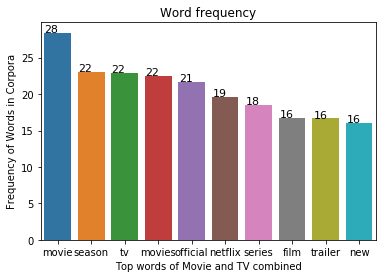

In [17]:
g=sns.barplot(x=word_freq.index,y=word_freq.values)
ax =g
plt.title('Word frequency')
plt.xlabel('Top words of Movie and TV combined')
plt.ylabel('Frequency of Words in Corpora')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()*1.005,
                                      p.get_height()*1.005),
                                      fontsize=11)

Conclusion:By converting words to counts and looking for patterns, machines can correctly identify the subreddit category the words originally came from. The vectorizer/model combinations performed very well with these two subreddits.There are many more models,vectorizers and parameters to try.Different subreddits with more overlap may provide more chalenges. It may make sense to experiment further eventually leading to a machine that can categorize a post without knowing where it could be filed before beginning.